In [6]:
%matplotlib inline
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import cv2

In [3]:
# Creating a sample 2D map of the room
map = np.zeros((1000, 1000))
# Assuming some gaps (passable areas)
map[100:900, 100:900] = 1
robot_size = 100  # in cm

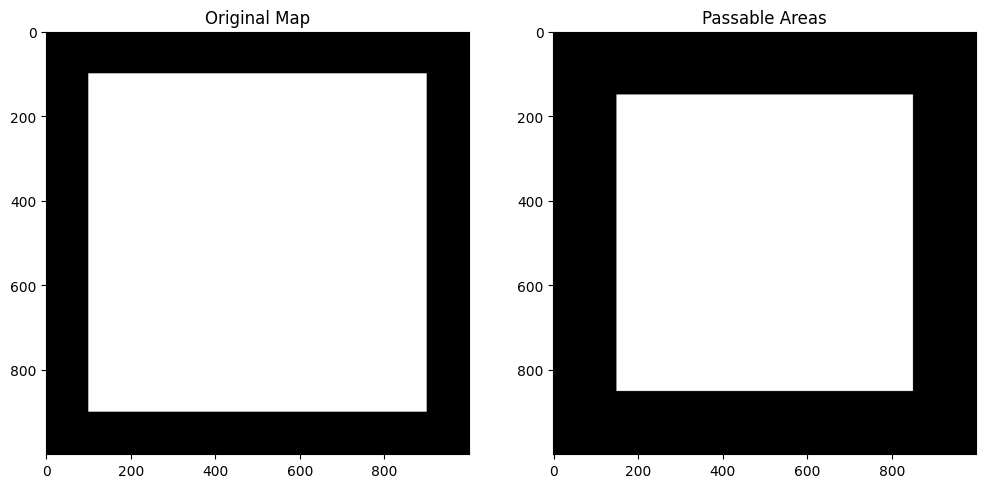

In [3]:
# Create a convolved map where the robot can pass
convolved_map = np.zeros_like(map)

for i in range(map.shape[0] - robot_size):
    for j in range(map.shape[1] - robot_size):
        if np.all(map[i:i + robot_size, j:j + robot_size] == 1):
            convolved_map[i + robot_size // 2, j + robot_size // 2] = 1

# Plotting the original map and the convolved map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Map")
plt.imshow(map, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Passable Areas")
plt.imshow(convolved_map, cmap='gray')
plt.show()


In [5]:

# Create a kernel representing the robot's footprint
kernel = np.ones((robot_size, robot_size))

# Convolve the map with the kernel to find passable areas
convolved_map = ndi.convolve(map, kernel, mode='constant', cval=0)

# Only keep areas where the robot can fully pass (no walls in the footprint)
passable_map = (convolved_map == robot_size**2).astype(int)



In [ ]:
# Plotting the original map and the passable areas map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Map")
plt.imshow(map, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Passable Areas")
plt.imshow(passable_map, cmap='gray')
plt.show()


In [9]:
# Create the kernel representing the robot's footprint
kernel = np.ones((robot_size, robot_size), np.uint8)

# Use morphology to find passable areas
passable_map = cv2.erode(map, kernel)

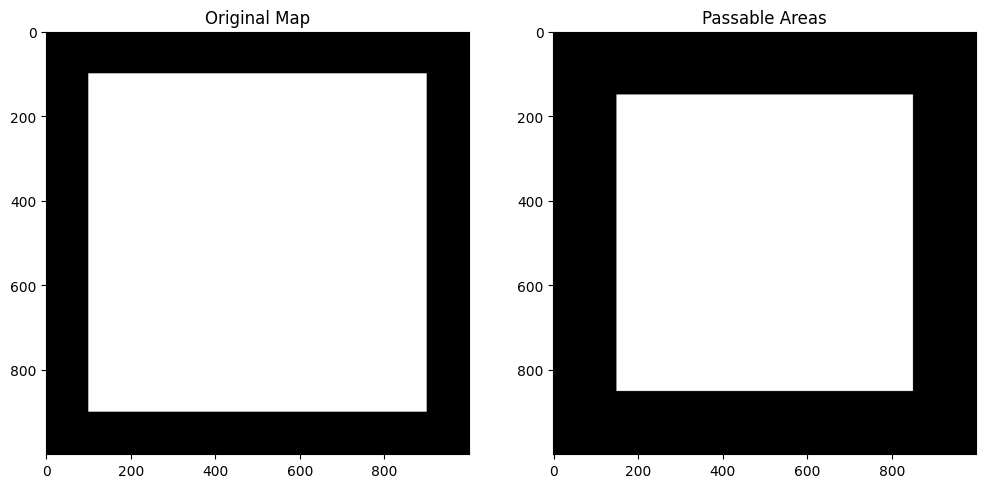

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Map")
plt.imshow(map, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Passable Areas")
plt.imshow(passable_map, cmap='gray')
plt.show()